In [3]:
from krylovevsolver import KrylovSolver
from krylovevsolver.dff import Filter, FilterGenerator
from krylovevsolver.negative_laplacian import s,m
from ngsolve import *
from netgen.geom2d import SplineGeometry
from ngsolve.webgui import Draw
import numpy as np

Note: Fourier method works for negative Laplacian problem only!


<Axes: title={'center': 'FOURIER Filter on (0, 357.14285714285717): L = 100, $\\tau$ = 0.0056'}>

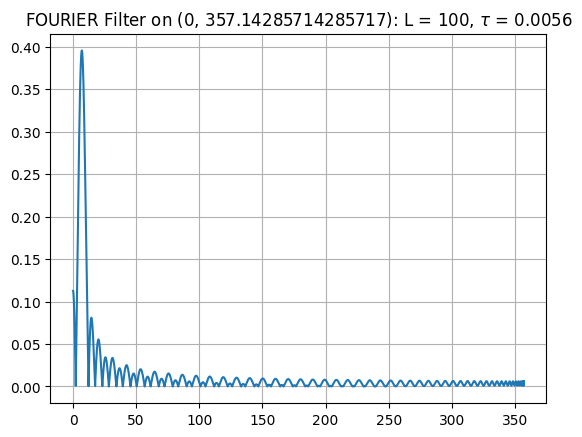

In [4]:
tau = 0.0056        # controlled interval up to omega_end = 2/tau = 360
L = 100

om_min_1, om_max_1 = 6, 8
alpha1 = FilterGenerator(L, tau, om_min_1, om_max_1, 2/tau).fourier()
alpha1.plot()

In [21]:
geo = SplineGeometry()
p1,p2,p3,p4,p5 = [ geo.AppendPoint(x,y) for x,y in [(0,0), (1,0), (0.8,0.4), (1,1), (0,1)] ]
geo.Append(["line", p1, p2])
geo.Append(["line", p2, p4])
geo.Append(["spline3", p4, p5, p1])

mesh = Mesh(geo.GenerateMesh(maxh=0.05))
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

Triangularization done after 0.01555 seconds:
	1510 degrees of freedom.
Discretization matrices computed after 0.22136 seconds.
Krylov iteration done after 14.41281 seconds.


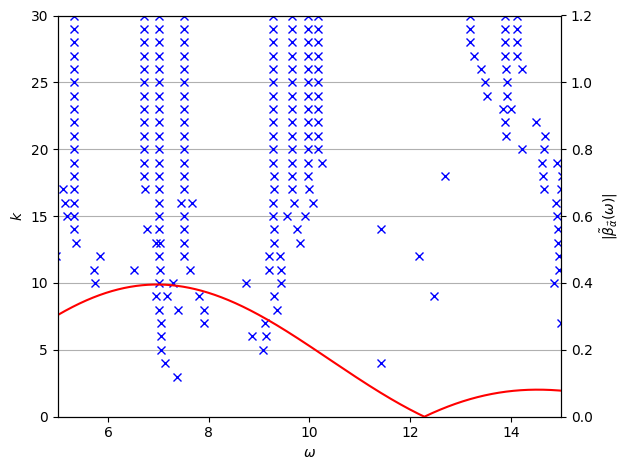

In [27]:
solver = KrylovSolver(s, m, mesh, L, tau, alpha1, m_max = 30)
solver.discretize(order=2)
solver.solve()
solver.plot(5, 15, "")

In [28]:
eigval, eigvec = solver.get_single_result(7*7, -1)
print(eigval)
solution = GridFunction(solver.fes, multidim=solver.mesh.nv)
solution.vec.data += eigvec
Draw(solution, mesh, deformation=True)

49.24012181898127


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene